# 作業:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 6s 1us/step


In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型
#宣告採用序列模型
model = Sequential()

In [8]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# 加入一層隱藏層
model.add(Dense(units=64, 
                input_dim=100, 
                kernel_initializer='normal', 
                activation='relu'))

In [10]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [13]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 106us/step - loss: 0.2814 - acc: 0.9188 - val_loss: 0.1286 - val_acc: 0.9627
Epoch 2/10
48000/48000 [==============================] - 5s 101us/step - loss: 0.1062 - acc: 0.9681 - val_loss: 0.0963 - val_acc: 0.9708
Epoch 3/10
48000/48000 [==============================] - 5s 101us/step - loss: 0.0706 - acc: 0.9778 - val_loss: 0.0890 - val_acc: 0.9733
Epoch 4/10
48000/48000 [==============================] - 5s 113us/step - loss: 0.0508 - acc: 0.9837 - val_loss: 0.0829 - val_acc: 0.9775
Epoch 5/10
48000/48000 [==============================] - 5s 102us/step - loss: 0.0391 - acc: 0.9878 - val_loss: 0.0877 - val_acc: 0.9762
Epoch 6/10
48000/48000 [==============================] - 5s 105us/step - loss: 0.0306 - acc: 0.9902 - val_loss: 0.1016 - val_acc: 0.9753
Epoch 7/10
48000/48000 [==============================] - 5s 101us/step - 

# 以圖形顯示訓練過程

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

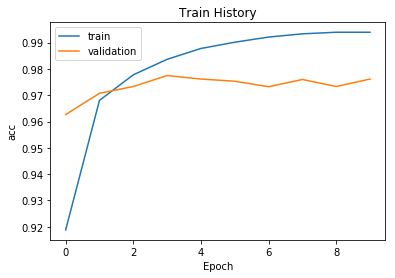

In [15]:
show_train_history(train_history,'acc','val_acc')

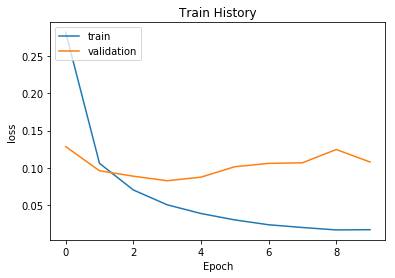

In [16]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [17]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 19us/step

accuracy= 0.9796


# 結果與討論

* 比較增加隱藏層前後差異
* 1. 參數個數：203,530 -> 218,058 (增加 7.1 %)
* 2. 訓練時間：43s -> 50s (增加 16.2 %)
* 3. 準確率：0.9786 -> 0.9796 (增加 0.1 %)
  
* 可以看到藉由增加一個隱藏層讓準確率上升，但是背後所付出的代價可能遠高於獲得的利益。
* 因此當準確率到達一定程度後，要考慮是否在增加隱藏層來追求準確率。
* 調整 Model 裡面參數可能會更有效率。